# Loadf the DOME 4.0 core ontology, 
this is the first step, we need to go through the entier ontologies and consolidate into an eco system

currently: 

1. the ontology is a patch work, no coherency,
2. EurosciVoc is not used !


## Tasks:
1. load the `~/dev/ontology/dome/Ontology-matters/dome4.0_core.ttl`
   - Working forlder: `~/dev/ontology/ontology_manager`
3. 


# Create initial Tier1 repository for DOME 4.0 

- [ ] *Create data sets* create a ~ bunch (20-100) synthetic datasets according to the data set ontoly (Tier1) using "simphony-rdflib"
- [ ] *Graph Data Base* store the datasets and the dome core ontology in a new ttl file (serialise to a file)
- [ ] *Semantic query* run a sparql query e.g., search all by keyword, and search for all datasets by specific issued data, later also search datasets accessed by specific user. 
- [ ] *Visualisation* for each results of query show graphs!
- [ ] *user access* create fake user data base for testing Provenance (based on ontology)
- [ ] *add each USer as a data set to the ontology GDB. User Ontology - accessed, searches, etc.
- [ ] for each access of the user we create a Tier1 DS which is linked to the user and to the previous data set (time wise).
- [ ] simulate multiple user access, and populate the clearing/provenance
- [ ] show graphs for the use.  \
- [ ] demonstrate provenance for the cases of Tier 1 DS catalog changes, and by whome. show a graph of the changes!
- [ ] fetch real data records and fill a local Tier 1 DS, e.g. frim materials project
- [ ] same as above, do  SPARQL query for keyword etc, with result in graph mode.


Note: DomeDataSet from D3.6 is in /Users/adham/dev/dome/Ontology-matters/domeo/domeo.ttl


In [1]:
from ontology_manager.ontology_utils import OntologyManager
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL
from datetime import date

In [2]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from ontodot.ontodot import vis, random_date_time, auto_bind_namespaces, printH, generate_uuid, generate_random_materialproject_id
from ontodot.ontodot import OntoVis

In [4]:
from types import SimpleNamespace
import os

In [5]:
dome=SimpleNamespace()

In [6]:
dome.g=Graph(bind_namespaces="rdflib")
dome.ns=Namespace('https://dome40.eu/semantics/dome4.0_core#')
dome.path = "/Users/adham/dev/ontology/dome/Ontology-matters/"
#dome.file='dome4.0_core.ttl' # this is one of the orig files. 
dome.file='dome4.0_core_tbox.ttl'

In [7]:
mio=Graph(bind_namespaces="rdflib")
mio.parse("/Users/adham/dev/ontology/ontology_manager/MIO/mio/mio.ttl")

<Graph identifier=Nb83ac24560d84f9e83ea8e992265cbf4 (<class 'rdflib.graph.Graph'>)>

In [8]:
dome.g.parse(os.path.join(dome.path, dome.file))
# we could add it to mio_manager manually actually, then use it as we want, 

<Graph identifier=N38330e9aa2b8456c8a8b7524ffd59111 (<class 'rdflib.graph.Graph'>)>

In [9]:
gg=dome.g + mio
vis(gg)

InvocationException: Program terminated with status: 1. stderr follows: Error: syntax error in line 1 
... <B></B> ...


In [ ]:
gc=dome.g+mio
ovis = OntoVis(gc)

In [ ]:
vis(ovis.zoom_in(URIRef("http://dome40.eu/semantics/dome4.0_core#data_set"), 2))

In [ ]:
binds="""
@prefix domeES: <http://dome40.eu/semantics/dome4.0_core#> .
@prefix mio: <http://www.ddmd.io/mio/> .
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix euroscivoc: <http://data.europa.eu/8mn/euroscivoc/> .
@prefix evmpo: <https://emmc.eu/semantics/evmpo/evmpo.ttl#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix http-meth: <http://www.w3.org/2011/http-methods#> .
@prefix msm: <http://iserve.kmi.open.ac.uk/ns/msm#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xs: <http://www.w3.org/2001/XMLSchema#> .
"""


In [13]:
nsbinds=auto_bind_namespaces(dome.g, binds)

g.bind(domeES, http://dome40.eu/semantics/dome4.0_core#)
g.bind(mio, http://www.ddmd.io/mio/)
g.bind(dcat, http://www.w3.org/ns/dcat#)
g.bind(dcterms, http://purl.org/dc/terms/)
g.bind(euroscivoc, http://data.europa.eu/8mn/euroscivoc/)
g.bind(evmpo, https://emmc.eu/semantics/evmpo/evmpo.ttl#)
g.bind(foaf, http://xmlns.com/foaf/0.1/)
g.bind(http-meth, http://www.w3.org/2011/http-methods#)
g.bind(msm, http://iserve.kmi.open.ac.uk/ns/msm#)
g.bind(owl, http://www.w3.org/2002/07/owl#)
g.bind(rdf, http://www.w3.org/1999/02/22-rdf-syntax-ns#)
g.bind(rdfs, http://www.w3.org/2000/01/rdf-schema#)
g.bind(skos, http://www.w3.org/2004/02/skos/core#)
g.bind(xs, http://www.w3.org/2001/XMLSchema#)


In [14]:
print(nsbinds)

{'domeES': Namespace('http://dome40.eu/semantics/dome4.0_core#'), 'mio': Namespace('http://www.ddmd.io/mio/'), 'dcat': Namespace('http://www.w3.org/ns/dcat#'), 'dcterms': Namespace('http://purl.org/dc/terms/'), 'euroscivoc': Namespace('http://data.europa.eu/8mn/euroscivoc/'), 'evmpo': Namespace('https://emmc.eu/semantics/evmpo/evmpo.ttl#'), 'foaf': Namespace('http://xmlns.com/foaf/0.1/'), 'http-meth': Namespace('http://www.w3.org/2011/http-methods#'), 'msm': Namespace('http://iserve.kmi.open.ac.uk/ns/msm#'), 'owl': Namespace('http://www.w3.org/2002/07/owl#'), 'rdf': Namespace('http://www.w3.org/1999/02/22-rdf-syntax-ns#'), 'rdfs': Namespace('http://www.w3.org/2000/01/rdf-schema#'), 'skos': Namespace('http://www.w3.org/2004/02/skos/core#'), 'xs': Namespace('http://www.w3.org/2001/XMLSchema#')}


In [15]:
cuds=SimpleNamespace()
cuds.g=Graph()
cuds_collection=set()

In [16]:
num_data_sets=1
domeES=nsbinds['domeES']
mioNS=nsbinds['mio']

In [26]:
for i in range(1, num_data_sets + 1):

    cuds.ds = URIRef(f"{domeES}DS_{i}")
    cuds.g.add((cuds.ds, RDF.type, domeES.data_set))
    
    # Add the required DOME 4.0 Data Set Ontology attributes
    # These are cuds.add(spo triplet)
    # cuds.uri = URIRef(f"http://materialsproject.org/data/calc_{i}")
    
    uri = URIRef("https://next-gen.materialsproject.org/materials/mp-19149")
    cuds.g.add( (uri, RDF.type, domeES.URI) ) 
    cuds.g.add((cuds.ds, domeES.hasPart, uri))
    
    printH(f"this is a DOME 4.0 Data Set: {cuds.ds}")
    printH(f"this Data Set point to: {uri}")

    wp = URIRef("https://next-gen.materialsproject.org/")
    cuds.g.add( (wp, RDF.type, domeES.web_platform) ) 
    cuds.g.add((cuds.ds, domeES.hasPart, wp))

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.issued_date) )    
    #todays_date = date.today()
    the_date=Literal(random_date_time())
    print(the_date)
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_date) ) 

    #g.add((date_instance_uri, date_property_uri, Literal(today_date, datatype=XSD.date)))


    #des = Literal("This is a description that will change later")
    #cuds.g.add( (des, RDF.type, domeES.description) ) 
    #cuds.g.add((cuds.ds, domeES.hasPart, des))

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.description) )    
    the_value=Literal("This is a description that will change later")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) ) 
   # g.add((data_set_uri, mio.hasPart, domeES.data_creator))
   # g.add((data_set_uri, mio.hasPart, domeES.license))
   # g.add((data_set_uri, mio.hasPart, domeES.data_publisher))
   # g.add((data_set_uri, mio.hasPart, domeES.title))
   # g.add((data_set_uri, mio.hasPart, domeES.semantic_keyword))
   # g.add((data_set_uri, mio.hasPart, domeES.syntactic_keyword))
    

this is a DOME 4.0 Data Set: http://dome40.eu/semantics/dome4.0_core#DS_1:
this Data Set point to: https://next-gen.materialsproject.org/materials/mp-19149:
2024-06-22T09:45:18.079399


### Any data set (given as a URIRef or URI in general) can and is a DOME 4.0 Data Set, this is simple achieved with the following line:

```
g.add((someURI, RDF.type, domeES.data_set))

```

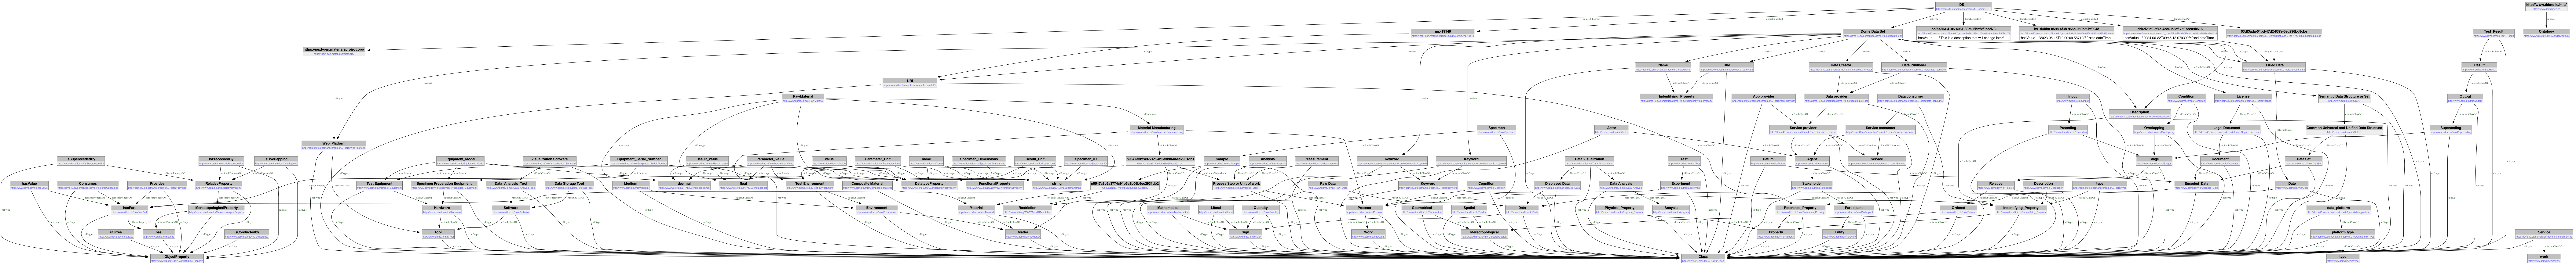

In [27]:
vis(cuds.g+dome.g+mio)

In [28]:
gc=cuds.g+dome.g+mio
ovis = OntoVis(gc)

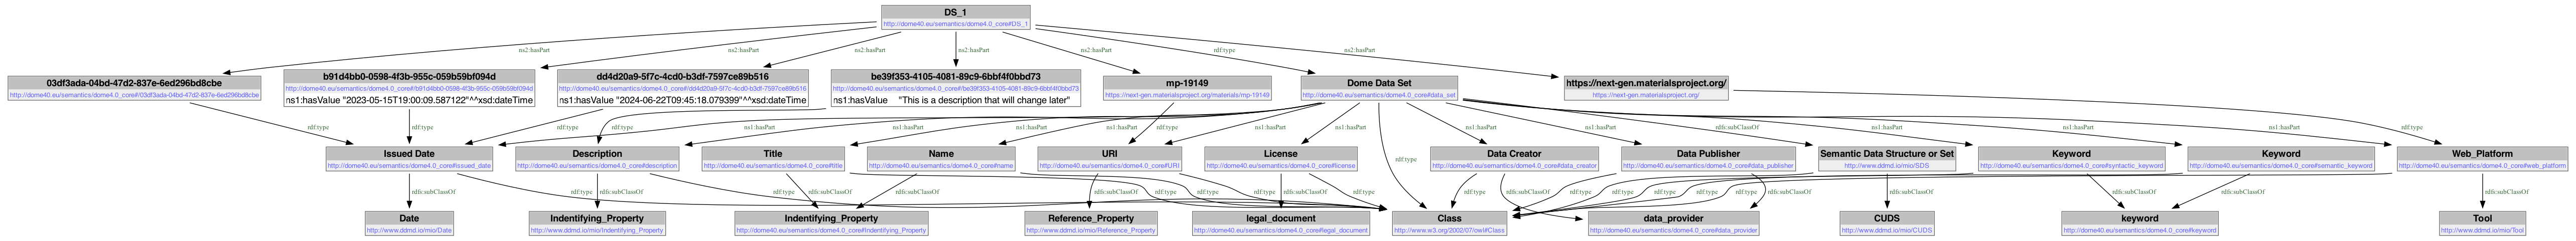

In [29]:
vis(ovis.zoom_in(URIRef("http://dome40.eu/semantics/dome4.0_core#DS_1"), 3))